<a href="https://colab.research.google.com/github/chaubeyarvind/DataAnalytics-NumPY/blob/main/Bricks_Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName("Spark Regression").getOrCreate()
spark

In [19]:
df1 = spark.read.csv("/content/sample_data/dataset1.csv", header=True, inferSchema=True)
df2 = spark.read.csv("/content/sample_data/CIC_DDoS.csv", header=True, inferSchema=True)

In [24]:
df1

DataFrame[longitude: double, latitude: double, housing_median_age: double, total_rooms: double, total_bedrooms: double, population: double, households: double, median_income: double, median_house_value: double, ocean_proximity: string, housing_median_status: string]

In [26]:
df1.show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+---------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|housing_median_status|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+---------------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|                  LOW|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|                  LOW|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|                  LOW|
|  -122.25|   37.85|              52.0| 

In [28]:
df1[df1['ocean_proximity'] == 'INLAND'].show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+---------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|housing_median_status|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+---------------------+
|  -121.92|   37.64|              46.0|     1280.0|         209.0|     512.0|     208.0|       5.1406|          315600.0|         INLAND|                  LOW|
|   -121.9|   37.66|              18.0|     7397.0|        1137.0|    3126.0|    1115.0|       6.4994|          323000.0|         INLAND|               MEDIUM|
|  -121.88|   37.68|              23.0|     2234.0|         270.0|     854.0|     286.0|        7.333|          337200.0|         INLAND|                  LOW|
|  -121.88|   37.67|              16.0| 

In [33]:
df1[df1['ocean_proximity'] == 'NEAR OCEAN'].show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+---------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|housing_median_status|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+---------------------+
|  -124.17|    41.8|              16.0|     2739.0|         480.0|    1259.0|     436.0|       3.7557|          109400.0|     NEAR OCEAN|               MEDIUM|
|   -124.3|    41.8|              19.0|     2672.0|         552.0|    1298.0|     478.0|       1.9797|           85800.0|     NEAR OCEAN|               MEDIUM|
|  -124.23|   41.75|              11.0|     3159.0|         616.0|    1343.0|     479.0|       2.4805|           73200.0|     NEAR OCEAN|               MEDIUM|
|  -124.21|   41.77|              17.0| 

In [35]:
df1.toPandas()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,housing_median_status
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,LOW
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,LOW
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,LOW
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,LOW
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,LOW
...,...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,LOW
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,MEDIUM
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,MEDIUM
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,MEDIUM


In [46]:
df1.toPandas()['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [40]:
df1[df1['housing_median_status'] == 'LOW'].show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+---------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|housing_median_status|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+---------------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|                  LOW|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|                  LOW|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|                  LOW|
|  -122.25|   37.85|              52.0| 

In [98]:
df1[df1['housing_median_status'] == 'GOOD'].show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+---------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|housing_median_status|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+---------------------+
|  -122.27|   37.81|              10.0|      875.0|         348.0|     546.0|     330.0|         0.76|          162500.0|       NEAR BAY|                 GOOD|
|  -122.27|    37.8|              10.0|      105.0|          42.0|     125.0|      39.0|       0.9722|          137500.0|       NEAR BAY|                 GOOD|
|   -122.3|   37.87|              10.0|      503.0|         118.0|     228.0|     100.0|       2.1705|          150000.0|       NEAR BAY|                 GOOD|
|  -122.16|   37.72|              10.0| 

In [47]:
df1[df1['total_rooms'] <  500].show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+---------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|housing_median_status|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+---------------------+
|  -122.29|   37.82|               2.0|      158.0|          43.0|      94.0|      57.0|       2.5625|           60000.0|       NEAR BAY|            VERY GOOD|
|  -122.29|   37.82|              49.0|      135.0|          29.0|      86.0|      23.0|       6.1183|           75000.0|       NEAR BAY|                  LOW|
|  -122.29|   37.81|              46.0|       12.0|           4.0|      18.0|       7.0|       0.4999|           67500.0|       NEAR BAY|                  LOW|
|  -122.27|   37.81|              52.0| 

In [99]:
df1[df1['total_rooms'] <  1000].show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+---------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|housing_median_status|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+---------------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|                  LOW|
|  -122.25|   37.85|              52.0|      919.0|         213.0|     413.0|     193.0|       4.0368|          269700.0|       NEAR BAY|                  LOW|
|  -122.26|   37.84|              52.0|      696.0|         191.0|     345.0|     174.0|       2.6736|          191300.0|       NEAR BAY|                  LOW|
|  -122.27|   37.85|              40.0| 

In [100]:
df1[df1['median_income'] > 8.2].show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+---------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|housing_median_status|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+---------------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|                  LOW|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|                  LOW|
|  -122.19|   37.84|              18.0|     1617.0|         210.0|     533.0|     194.0|      11.6017|          392600.0|       NEAR BAY|               MEDIUM|
|  -122.19|   37.83|              28.0| 

In [53]:
df1[df1['longitude'] < -123.4].show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+---------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|housing_median_status|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+---------------------+
|  -124.17|    41.8|              16.0|     2739.0|         480.0|    1259.0|     436.0|       3.7557|          109400.0|     NEAR OCEAN|               MEDIUM|
|   -124.3|    41.8|              19.0|     2672.0|         552.0|    1298.0|     478.0|       1.9797|           85800.0|     NEAR OCEAN|               MEDIUM|
|  -124.23|   41.75|              11.0|     3159.0|         616.0|    1343.0|     479.0|       2.4805|           73200.0|     NEAR OCEAN|               MEDIUM|
|  -124.21|   41.77|              17.0| 

In [55]:
df1[df1['median_income'] > 8.1].show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+---------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|housing_median_status|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+---------------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|                  LOW|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|                  LOW|
|  -122.19|   37.84|              18.0|     1617.0|         210.0|     533.0|     194.0|      11.6017|          392600.0|       NEAR BAY|               MEDIUM|
|  -122.19|   37.83|              28.0| 

In [83]:
df1[(df1['median_income'] > 8.1) & (df1['ocean_proximity'] == 'NEAR BAY')].show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+---------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|housing_median_status|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+---------------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|                  LOW|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|                  LOW|
|  -122.19|   37.84|              18.0|     1617.0|         210.0|     533.0|     194.0|      11.6017|          392600.0|       NEAR BAY|               MEDIUM|
|  -122.19|   37.83|              28.0| 

In [81]:
df1[(df1['population']>2000) & (df1['housing_median_status'] == 'MEDIUM')].show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+---------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|housing_median_status|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+---------------------+
|   -122.3|    37.9|              15.0|     5083.0|        1212.0|    2420.0|    1146.0|       4.5824|          256100.0|       NEAR BAY|               MEDIUM|
|   -122.3|   37.84|              14.0|     7355.0|        2408.0|    3100.0|    2051.0|       4.0018|          143800.0|       NEAR BAY|               MEDIUM|
|  -122.06|   37.77|              12.0|    14316.0|        2045.0|    5781.0|    2007.0|       7.2634|          341600.0|       NEAR BAY|               MEDIUM|
|  -122.15|   37.71|              18.0| 

In [75]:
df1[df1['population'] >2000].show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+---------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|housing_median_status|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+---------------------+
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|                  LOW|
|  -122.26|    37.8|              36.0|     5329.0|        2477.0|    3469.0|    2323.0|       2.0096|          130000.0|       NEAR BAY|                  LOW|
|  -122.26|   37.82|              31.0|     4596.0|        1331.0|    2048.0|    1180.0|       2.8345|          183800.0|       NEAR BAY|                  LOW|
|  -122.26|   37.82|              22.0| 

In [80]:
df1[(df1['ocean_proximity'] == 'NEAR BAY') | (df1['ocean_proximity'] =='NEAR OCEAN')].show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+---------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|housing_median_status|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+---------------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|                  LOW|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|                  LOW|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|                  LOW|
|  -122.25|   37.85|              52.0| 

In [85]:
df1.agg({'total_rooms': 'mean'}).show()

+------------------+
|  avg(total_rooms)|
+------------------+
|2636.5042333480155|
+------------------+



In [88]:
df1.agg({'households': 'max'}).show()

+---------------+
|max(households)|
+---------------+
|         6082.0|
+---------------+



In [90]:
df1.agg({'housing_median_age':'min'}).show()

+-----------------------+
|min(housing_median_age)|
+-----------------------+
|                    1.0|
+-----------------------+



In [92]:
df1.agg({'longitude':'max'}).show()

+--------------+
|max(longitude)|
+--------------+
|       -114.31|
+--------------+



In [96]:
df1.agg({'longitude':'min', 'latitude':'max'}).show()

+-------------+--------------+
|max(latitude)|min(longitude)|
+-------------+--------------+
|        41.95|       -124.35|
+-------------+--------------+



In [102]:
df1.agg({'longitude':'min', 'latitude':'min'}).show()

+-------------+--------------+
|min(latitude)|min(longitude)|
+-------------+--------------+
|        32.54|       -124.35|
+-------------+--------------+



In [104]:
df1.select('total_rooms','total_bedrooms','population').show()

+-----------+--------------+----------+
|total_rooms|total_bedrooms|population|
+-----------+--------------+----------+
|      880.0|         129.0|     322.0|
|     7099.0|        1106.0|    2401.0|
|     1467.0|         190.0|     496.0|
|     1274.0|         235.0|     558.0|
|     1627.0|         280.0|     565.0|
|      919.0|         213.0|     413.0|
|     2535.0|         489.0|    1094.0|
|     3104.0|         687.0|    1157.0|
|     2555.0|         665.0|    1206.0|
|     3549.0|         707.0|    1551.0|
|     2202.0|         434.0|     910.0|
|     3503.0|         752.0|    1504.0|
|     2491.0|         474.0|    1098.0|
|      696.0|         191.0|     345.0|
|     2643.0|         626.0|    1212.0|
|     1120.0|         283.0|     697.0|
|     1966.0|         347.0|     793.0|
|     1228.0|         293.0|     648.0|
|     2239.0|         455.0|     990.0|
|     1503.0|         298.0|     690.0|
+-----------+--------------+----------+
only showing top 20 rows



In [106]:
df1[(df1['ocean_proximity'] == 'NEAR BAY') | (df1['ocean_proximity'] =='NEAR OCEAN')].select('total_rooms','total_bedrooms','population','ocean_proximity').show()

+-----------+--------------+----------+---------------+
|total_rooms|total_bedrooms|population|ocean_proximity|
+-----------+--------------+----------+---------------+
|      880.0|         129.0|     322.0|       NEAR BAY|
|     7099.0|        1106.0|    2401.0|       NEAR BAY|
|     1467.0|         190.0|     496.0|       NEAR BAY|
|     1274.0|         235.0|     558.0|       NEAR BAY|
|     1627.0|         280.0|     565.0|       NEAR BAY|
|      919.0|         213.0|     413.0|       NEAR BAY|
|     2535.0|         489.0|    1094.0|       NEAR BAY|
|     3104.0|         687.0|    1157.0|       NEAR BAY|
|     2555.0|         665.0|    1206.0|       NEAR BAY|
|     3549.0|         707.0|    1551.0|       NEAR BAY|
|     2202.0|         434.0|     910.0|       NEAR BAY|
|     3503.0|         752.0|    1504.0|       NEAR BAY|
|     2491.0|         474.0|    1098.0|       NEAR BAY|
|      696.0|         191.0|     345.0|       NEAR BAY|
|     2643.0|         626.0|    1212.0|       NE

In [107]:
df1[(df1['ocean_proximity'] == 'NEAR BAY') | (df1['ocean_proximity'] =='NEAR OCEAN')].agg({'housing_median_age':'min'}).show()

+-----------------------+
|min(housing_median_age)|
+-----------------------+
|                    2.0|
+-----------------------+



In [114]:
df1[df1['ocean_proximity'] == 'NEAR BAY'].agg({'total_rooms':'mean'}).show()

+------------------+
|  avg(total_rooms)|
+------------------+
|2490.3352422907487|
+------------------+



In [115]:
df1[df1['housing_median_status'] =='LOW'].agg({'total_bedrooms':'mean','total_rooms':'max','population':'min'}).show()

+----------------+-------------------+---------------+
|max(total_rooms)|avg(total_bedrooms)|min(population)|
+----------------+-------------------+---------------+
|         18132.0| 464.67155032753396|            5.0|
+----------------+-------------------+---------------+



In [120]:
df1[df1['housing_median_status'] =='LOW'].agg({'total_bedrooms':'min','total_rooms':'mean','population':'max'}).show()

+------------------+-------------------+---------------+
|  avg(total_rooms)|min(total_bedrooms)|max(population)|
+------------------+-------------------+---------------+
|2202.7895329999296|                1.0|        12427.0|
+------------------+-------------------+---------------+



In [124]:
df1.summary().show()

+-------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+---------------+---------------------+
|summary|          longitude|          latitude|housing_median_age|       total_rooms|    total_bedrooms|        population|        households|     median_income|median_house_value|ocean_proximity|housing_median_status|
+-------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+---------------+---------------------+
|  count|              20433|             20433|             20433|             20433|             20433|             20433|             20433|             20433|             20433|          20433|                20433|
|   mean|-119.57068859198068| 35.63322125972706|28.633093525179856|2636.5042333480155| 537.8705525375618|1424.9469485635

In [126]:
df1.toPandas()['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [128]:
df1.select('longitude').summary().show()

+-------+-------------------+
|summary|          longitude|
+-------+-------------------+
|  count|              20433|
|   mean|-119.57068859198068|
| stddev|  2.003577890751096|
|    min|            -124.35|
|    25%|             -121.8|
|    50%|             -118.5|
|    75%|            -118.01|
|    max|            -114.31|
+-------+-------------------+



In [130]:
df1.summary().select('summary','longitude').show()

+-------+-------------------+
|summary|          longitude|
+-------+-------------------+
|  count|              20433|
|   mean|-119.57068859198068|
| stddev|  2.003577890751096|
|    min|            -124.35|
|    25%|             -121.8|
|    50%|             -118.5|
|    75%|            -118.01|
|    max|            -114.31|
+-------+-------------------+



In [133]:
df1.summary().select('summary','latitude').show()

+-------+------------------+
|summary|          latitude|
+-------+------------------+
|  count|             20433|
|   mean| 35.63322125972706|
| stddev|2.1363476663779872|
|    min|             32.54|
|    25%|             33.93|
|    50%|             34.26|
|    75%|             37.72|
|    max|             41.95|
+-------+------------------+



In [135]:
 df1[df1['housing_median_status'] =='LOW'].summary().show()

+-------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+---------------+---------------------+
|summary|          longitude|          latitude|housing_median_age|       total_rooms|    total_bedrooms|        population|        households|     median_income|median_house_value|ocean_proximity|housing_median_status|
+-------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+---------------+---------------------+
|  count|              14197|             14197|             14197|             14197|             14197|             14197|             14197|             14197|             14197|          14197|                14197|
|   mean|-119.61577516376387| 35.56066211171382| 35.14312883003451|2202.7895329999296|464.67155032753396|1258.4166373177

In [137]:
df1[df1['housing_median_status'] =='LOW'].select('population','total_rooms', 'median_income').summary().show()

+-------+------------------+------------------+------------------+
|summary|        population|       total_rooms|     median_income|
+-------+------------------+------------------+------------------+
|  count|             14197|             14197|             14197|
|   mean|1258.4166373177432|2202.7895329999296|3.7519537437486825|
| stddev|  798.752608914219|1366.6444891933459|1.8890178363874752|
|    min|               5.0|               8.0|            0.4999|
|    25%|             760.0|            1353.0|            2.4833|
|    50%|            1091.0|            1942.0|            3.4009|
|    75%|            1551.0|            2729.0|            4.5655|
|    max|           12427.0|           18132.0|           15.0001|
+-------+------------------+------------------+------------------+



In [142]:
df1[df1['total_bedrooms'] > 1000].select('population','total_rooms', 'median_income').summary().show()

+-------+------------------+-----------------+------------------+
|summary|        population|      total_rooms|     median_income|
+-------+------------------+-----------------+------------------+
|  count|              1880|             1880|              1880|
|   mean|3686.3606382978724|7313.393085106383| 3.907836968085095|
| stddev|2062.0825096174126|3932.801633560444|1.6551772317118123|
|    min|             265.0|           1714.0|            0.6775|
|    25%|            2534.0|           4949.0|            2.7386|
|    50%|            3221.0|           6296.0|            3.6071|
|    75%|            4285.0|           8389.0|             4.744|
|    max|           35682.0|          39320.0|            13.947|
+-------+------------------+-----------------+------------------+



In [144]:
df1[df1['total_bedrooms'] > 10000].select('population','total_rooms', 'median_income').summary().show()

+-------+----------+-----------+-------------+
|summary|population|total_rooms|median_income|
+-------+----------+-----------+-------------+
|  count|         0|          0|            0|
|   mean|      null|       null|         null|
| stddev|      null|       null|         null|
|    min|      null|       null|         null|
|    25%|      null|       null|         null|
|    50%|      null|       null|         null|
|    75%|      null|       null|         null|
|    max|      null|       null|         null|
+-------+----------+-----------+-------------+



In [146]:
df1.select('latitude').show()

+--------+
|latitude|
+--------+
|   37.88|
|   37.86|
|   37.85|
|   37.85|
|   37.85|
|   37.85|
|   37.84|
|   37.84|
|   37.84|
|   37.84|
|   37.85|
|   37.85|
|   37.85|
|   37.84|
|   37.85|
|   37.85|
|   37.85|
|   37.85|
|   37.84|
|   37.84|
+--------+
only showing top 20 rows



In [148]:
import matplotlib.pyplot as plt

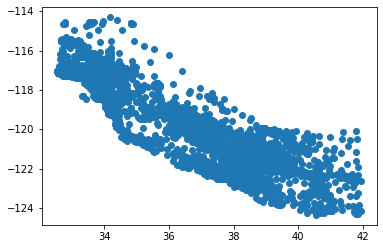

In [151]:
plt.scatter(df1.select('latitude').toPandas(), df1.select('longitude').toPandas() )

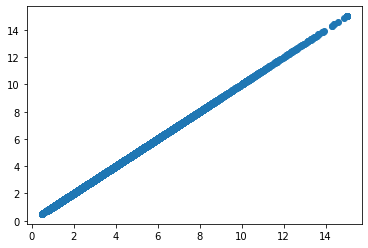

In [153]:
plt.scatter(df1.select('median_income').toPandas(), df1.select('median_income').toPandas() )

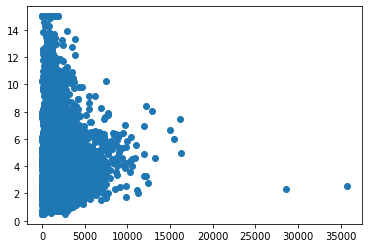

In [154]:
plt.scatter(df1.select('population').toPandas(), df1.select('median_income').toPandas() )